<a href="https://colab.research.google.com/github/semesarker/A-Text-Independent-Speech-Emotion-Recognition-Based-on-Convolution-Neural-Network/blob/main/CNN_2D_Model_using_Melspectrogram_feature_on_Ravdess%26_TESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/rav.zip
   creating: rav/
   creating: rav/Actor_01/
  inflating: rav/Actor_01/03-01-01-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-01-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-01-02-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-01-02-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-01-01.wav  
  inflating: rav/Actor_01/03-01-02-02-02-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-01-02-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-01-01.wav  
  inflating: rav/Actor_01/03-01-03-01-02-02-01.wav  
  infl

In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/TESS.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/RAV_TESS_dataset_code/RAV_TESS/ravdess_tess/TESS.zip
   creating: TESS/
   creating: TESS/OAF_angry/
  inflating: TESS/OAF_angry/OAF_back_angry.wav  
  inflating: TESS/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS/OAF_angry/OAF_base_angry.wav  
  inflating: TESS/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS/OAF_angry/OAF_book_angry.wav  
  inflating: TESS/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS/OAF_angry/OAF_cab_angry.wav  
  inflating: TESS/OAF_angry/OAF_calm_angry.wav  
  inflating: TESS/OAF_angry/OAF_came_angry.wav  
  inflating: TESS/OAF_angry/OAF_cause_angry.wav  
  inflating: TESS/OAF_angry/OAF_chain_angry.wav  
  inflating: TES

In [ ]:
# Keras
#import tensorflow as tf
from IPython.display import Audio
import keras
from keras import regularizers

from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D,Conv2D,MaxPool2D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import (Conv2D,Conv2DTranspose, GlobalAveragePooling2D, BatchNormalization, Flatten, Dropout,
                          GlobalMaxPool2D, MaxPool2D, concatenate, Activation, Input, Dense)
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer


from keras_preprocessing.sequence import pad_sequences


# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Other
from tqdm import tqdm, tqdm_pandas
import scipy
from scipy.stats import skew
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob
import os
import sys
import IPython.display as Audio  # To play sound in the notebook
import warnings

import numpy as np # linear algebra
import pandas as pd
from tqdm import tqdm
from glob import glob
from keras.layers import *
from keras.models import *
from keras.utils import *
import numpy as np
import os
from tensorflow.keras.optimizers import Adam

# ignore warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [ ]:
Ravdess = "/content/rav"
ravdess_directory_list = os.listdir(Ravdess)
ravdess_directory_list

['Actor_12',
 'Actor_14',
 'Actor_22',
 'Actor_19',
 'Actor_21',
 'Actor_02',
 'Actor_20',
 'Actor_13',
 'Actor_09',
 'Actor_08',
 'Actor_18',
 'Actor_23',
 'Actor_17',
 'Actor_04',
 'Actor_03',
 'Actor_15',
 'Actor_05',
 'Actor_06',
 'Actor_10',
 'Actor_24',
 'Actor_16',
 'Actor_01',
 'Actor_07',
 'Actor_11']

In [ ]:
# Ravdess preprocess
ravdess_directory_list = os.listdir(Ravdess)
file_path = []
file_emotion = []
for directory in ravdess_directory_list:
    # 24 different actors in Ravdess directory needed to be extracted as files for each actor
    actor = os.listdir(Ravdess + '/' + directory)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + '/' + directory + '/' + file)

In [ ]:
file_path

['/content/rav/Actor_12/03-01-08-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-01-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-07-02-02-02-12.wav',
 '/content/rav/Actor_12/03-01-02-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-03-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-07-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-02-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-05-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-07-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-05-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-07-02-01-02-12.wav',
 '/content/rav/Actor_12/03-01-06-01-02-02-12.wav',
 '/content/rav/Actor_12/03-01-03-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-04-02-02-01-12.wav',
 '/content/rav/Actor_12/03-01-08-01-01-01-12.wav',
 '/content/rav/Actor_12/03-01-01-01-02-01-12.wav',
 '/content/rav/Actor_12/03-01-08-01-01-02-12.wav',
 '/content/rav/Actor_12/03-01-02-02-01-02-12.wav',
 '/content/rav/Actor_12/03-01-06-02-01-01-12.wav',
 '/content/rav/Actor_12/03-01-0

In [ ]:
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)
# decode integers to actual emotions
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

,Emotions,Path
0,surprise,/content/rav/Actor_12/03-01-08-01-02-01-12.wav
1,neutral,/content/rav/Actor_12/03-01-01-01-02-02-12.wav
2,disgust,/content/rav/Actor_12/03-01-07-02-02-02-12.wav
3,calm,/content/rav/Actor_12/03-01-02-01-01-02-12.wav
4,happy,/content/rav/Actor_12/03-01-03-01-02-02-12.wav


In [ ]:
Ravdess_df.shape

(1440, 2)

In [ ]:

Tess='/content/TESS'
tess_directory_list = os.listdir(Tess)
tess_directory_list

['YAF_disgust',
 'OAF_happy',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_Pleasant_surprise',
 'YAF_pleasant_surprised',
 'YAF_sad',
 'OAF_Fear',
 'YAF_neutral',
 'OAF_neutral',
 'YAF_happy',
 'YAF_angry',
 'YAF_fear']

In [ ]:
# TESS preprocess
# increase the data available for surprise emotion
tess_directory_list = os.listdir(Tess)
file_path = []
file_emotion = []
for dir in tess_directory_list:
    directories = os.listdir(Tess +'/'+  dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + '/' + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])
# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

,Emotions,Path
0,disgust,/content/TESS/YAF_disgust/YAF_rat_disgust.wav
1,disgust,/content/TESS/YAF_disgust/YAF_red_disgust.wav
2,disgust,/content/TESS/YAF_disgust/YAF_puff_disgust.wav
3,disgust,/content/TESS/YAF_disgust/YAF_shirt_disgust.wav
4,disgust,/content/TESS/YAF_disgust/YAF_far_disgust.wav


In [ ]:
Tess_df.shape

(2800, 2)

In [ ]:
data_path = pd.concat([Ravdess_df, Tess_df], axis = 0)
data_path

,Emotions,Path
0,surprise,/content/rav/Actor_12/03-01-08-01-02-01-12.wav
1,neutral,/content/rav/Actor_12/03-01-01-01-02-02-12.wav
2,disgust,/content/rav/Actor_12/03-01-07-02-02-02-12.wav
3,calm,/content/rav/Actor_12/03-01-02-01-01-02-12.wav
4,happy,/content/rav/Actor_12/03-01-03-01-02-02-12.wav
...,...,...
2795,fear,/content/TESS/YAF_fear/YAF_hole_fear.wav
2796,fear,/content/TESS/YAF_fear/YAF_dip_fear.wav
2797,fear,/content/TESS/YAF_fear/YAF_king_fear.wav
2798,fear,/content/TESS/YAF_fear/YAF_hire_fear.wav


In [ ]:
index = list(np.arange(start=0, stop=4240, step=1))
data_path.index = index

In [ ]:
data_path.reset_index()

,index,Emotions,Path
0,0,surprise,/content/rav/Actor_12/03-01-08-01-02-01-12.wav
1,1,neutral,/content/rav/Actor_12/03-01-01-01-02-02-12.wav
2,2,disgust,/content/rav/Actor_12/03-01-07-02-02-02-12.wav
3,3,calm,/content/rav/Actor_12/03-01-02-01-01-02-12.wav
4,4,happy,/content/rav/Actor_12/03-01-03-01-02-02-12.wav
...,...,...,...
4235,4235,fear,/content/TESS/YAF_fear/YAF_hole_fear.wav
4236,4236,fear,/content/TESS/YAF_fear/YAF_dip_fear.wav
4237,4237,fear,/content/TESS/YAF_fear/YAF_king_fear.wav
4238,4238,fear,/content/TESS/YAF_fear/YAF_hire_fear.wav


In [ ]:
data_path.drop(['index'],axis=1)

KeyError: ignored

In [ ]:
data_path

,Emotions,Path
0,surprise,/content/rav/Actor_12/03-01-08-01-02-01-12.wav
1,neutral,/content/rav/Actor_12/03-01-01-01-02-02-12.wav
2,disgust,/content/rav/Actor_12/03-01-07-02-02-02-12.wav
3,calm,/content/rav/Actor_12/03-01-02-01-01-02-12.wav
4,happy,/content/rav/Actor_12/03-01-03-01-02-02-12.wav
...,...,...
4235,fear,/content/TESS/YAF_fear/YAF_hole_fear.wav
4236,fear,/content/TESS/YAF_fear/YAF_dip_fear.wav
4237,fear,/content/TESS/YAF_fear/YAF_king_fear.wav
4238,fear,/content/TESS/YAF_fear/YAF_hire_fear.wav


In [ ]:
data_path.Emotions.value_counts()

surprise    592
disgust     592
happy       592
angry       592
fear        592
sad         592
neutral     496
calm        192
Name: Emotions, dtype: int64

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
df=np.empty(shape=(data_path.shape[0], 30, 600))

In [ ]:
j = 0
input_length = 16000 * 2.5
for i in tqdm(data_path.Path):
    path = i
    data, sr = librosa.core.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')

    if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)
    # # Random offset / Padding
    # if len(data) > input_length:
    #     max_offset = len(data) - input_length
    #     offset = np.random.randint(max_offset)
    #     data = data[offset:(input_length+offset)]
    # else:
    #     if input_length > len(data):
    #         max_offset = input_length - len(data)
    #         offset = np.random.randint(max_offset)
    #     else:
    #         offset = 0
    #     data = np.pad(data, (offset, int(input_length) - len(data) - offset), "constant")


    melspec = librosa.feature.melspectrogram(data,sr=16000,n_mels = 30)
    logspec = librosa.amplitude_to_db(melspec)
    #MFCC = librosa.feature.mfcc(y=wav, sr=sr, n_mfcc=30)
    df[j,0:30,0:logspec.shape[1]] = logspec
    j = j+1
    print(logspec.shape)

  0%|          | 3/4240 [00:00<16:15,  4.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 7/4240 [00:01<07:13,  9.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 11/4240 [00:01<05:13, 13.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 16/4240 [00:01<04:14, 16.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  0%|          | 19/4240 [00:01<03:54, 17.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 24/4240 [00:01<03:40, 19.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 29/4240 [00:02<03:36, 19.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 32/4240 [00:02<03:31, 19.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 38/4240 [00:02<03:34, 19.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 41/4240 [00:02<03:31, 19.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 46/4240 [00:03<03:43, 18.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|          | 51/4240 [00:03<03:36, 19.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 55/4240 [00:03<03:38, 19.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  1%|▏         | 60/4240 [00:03<03:32, 19.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 65/4240 [00:04<03:28, 19.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 70/4240 [00:04<03:26, 20.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 73/4240 [00:04<03:25, 20.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 79/4240 [00:04<03:27, 20.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 85/4240 [00:05<03:22, 20.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 88/4240 [00:05<03:22, 20.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 94/4240 [00:05<03:21, 20.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 97/4240 [00:05<03:21, 20.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  2%|▏         | 103/4240 [00:05<03:24, 20.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 109/4240 [00:06<03:25, 20.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 112/4240 [00:06<03:25, 20.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 118/4240 [00:06<03:27, 19.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 122/4240 [00:06<03:28, 19.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 127/4240 [00:07<03:25, 20.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 132/4240 [00:07<03:22, 20.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 135/4240 [00:07<03:33, 19.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 139/4240 [00:07<03:44, 18.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  3%|▎         | 143/4240 [00:07<03:39, 18.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

  3%|▎         | 147/4240 [00:08<03:35, 18.95it/s]


(30, 79)
(30, 79)
(30, 79)


  4%|▎         | 151/4240 [00:08<03:32, 19.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

  4%|▎         | 156/4240 [00:08<03:27, 19.65it/s]


(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 161/4240 [00:08<03:26, 19.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 166/4240 [00:09<03:21, 20.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 169/4240 [00:09<03:21, 20.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 175/4240 [00:09<03:21, 20.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 178/4240 [00:09<03:21, 20.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 183/4240 [00:09<03:25, 19.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  4%|▍         | 188/4240 [00:10<03:24, 19.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 193/4240 [00:10<03:22, 19.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 196/4240 [00:10<03:20, 20.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 201/4240 [00:10<03:34, 18.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 206/4240 [00:11<03:25, 19.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▍         | 211/4240 [00:11<03:21, 19.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 215/4240 [00:11<03:23, 19.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 219/4240 [00:11<03:30, 19.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 223/4240 [00:12<03:28, 19.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  5%|▌         | 228/4240 [00:12<03:25, 19.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

  5%|▌         | 230/4240 [00:12<03:27, 19.28it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 236/4240 [00:12<03:20, 19.97it/s]

(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 241/4240 [00:12<03:20, 19.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 246/4240 [00:13<03:17, 20.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 249/4240 [00:13<03:15, 20.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 255/4240 [00:13<03:17, 20.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 258/4240 [00:13<03:24, 19.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▌         | 263/4240 [00:14<03:21, 19.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 269/4240 [00:14<03:17, 20.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  6%|▋         | 275/4240 [00:14<03:12, 20.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 278/4240 [00:14<03:23, 19.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 283/4240 [00:15<03:18, 19.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 289/4240 [00:15<03:16, 20.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 292/4240 [00:15<03:15, 20.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 298/4240 [00:15<03:11, 20.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 301/4240 [00:15<03:17, 19.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 307/4240 [00:16<03:14, 20.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 313/4240 [00:16<03:12, 20.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  7%|▋         | 316/4240 [00:16<03:11, 20.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 322/4240 [00:16<03:14, 20.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 328/4240 [00:17<03:10, 20.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 331/4240 [00:17<03:13, 20.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 337/4240 [00:17<03:14, 20.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 340/4240 [00:17<03:20, 19.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 345/4240 [00:18<03:17, 19.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 350/4240 [00:18<03:14, 20.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 355/4240 [00:18<03:15, 19.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  8%|▊         | 360/4240 [00:18<03:13, 20.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 365/4240 [00:19<03:15, 19.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▊         | 370/4240 [00:19<03:16, 19.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 375/4240 [00:19<03:16, 19.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 377/4240 [00:19<03:18, 19.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 385/4240 [00:20<03:15, 19.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 389/4240 [00:20<03:18, 19.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 394/4240 [00:20<03:14, 19.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


  9%|▉         | 399/4240 [00:20<03:14, 19.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 403/4240 [00:21<03:18, 19.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 407/4240 [00:21<03:31, 18.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 411/4240 [00:21<03:29, 18.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 415/4240 [00:21<03:22, 18.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 10%|▉         | 419/4240 [00:21<03:22, 18.83it/s]


(30, 79)
(30, 79)
(30, 79)


 10%|▉         | 423/4240 [00:22<03:20, 19.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 427/4240 [00:22<03:21, 18.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 432/4240 [00:22<03:16, 19.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 437/4240 [00:22<03:11, 19.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 10%|█         | 442/4240 [00:23<03:08, 20.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 446/4240 [00:23<03:14, 19.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 451/4240 [00:23<03:09, 19.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 456/4240 [00:23<03:06, 20.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 459/4240 [00:24<03:12, 19.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 464/4240 [00:24<03:14, 19.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 469/4240 [00:24<03:11, 19.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█         | 474/4240 [00:24<03:09, 19.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 479/4240 [00:25<03:08, 19.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 483/4240 [00:25<03:10, 19.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 11%|█▏        | 487/4240 [00:25<03:11, 19.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 492/4240 [00:25<03:06, 20.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 497/4240 [00:25<03:04, 20.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 503/4240 [00:26<03:04, 20.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 506/4240 [00:26<03:05, 20.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 512/4240 [00:26<03:05, 20.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 518/4240 [00:26<03:03, 20.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 521/4240 [00:27<03:09, 19.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▏        | 526/4240 [00:27<03:07, 19.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 12%|█▎        | 530/4240 [00:27<03:12, 19.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 534/4240 [00:27<03:14, 19.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 539/4240 [00:28<03:08, 19.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 544/4240 [00:28<03:10, 19.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 548/4240 [00:28<03:12, 19.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 553/4240 [00:28<03:07, 19.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 557/4240 [00:28<03:11, 19.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 561/4240 [00:29<03:10, 19.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 565/4240 [00:29<03:23, 18.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 13%|█▎        | 569/4240 [00:29<03:20, 18.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 573/4240 [00:29<03:16, 18.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 577/4240 [00:30<03:15, 18.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▎        | 582/4240 [00:30<03:12, 19.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 587/4240 [00:30<03:06, 19.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 591/4240 [00:30<03:08, 19.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 595/4240 [00:31<03:09, 19.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 599/4240 [00:31<03:16, 18.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 603/4240 [00:31<03:16, 18.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 607/4240 [00:31<03:15, 18.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 14%|█▍        | 611/4240 [00:31<03:15, 18.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 615/4240 [00:32<03:11, 18.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 619/4240 [00:32<03:13, 18.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 623/4240 [00:32<03:13, 18.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 627/4240 [00:32<03:13, 18.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 631/4240 [00:32<03:11, 18.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▍        | 635/4240 [00:33<03:09, 19.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 639/4240 [00:33<03:10, 18.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 15%|█▌        | 643/4240 [00:33<03:09, 18.96it/s]


(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 647/4240 [00:33<03:09, 19.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 652/4240 [00:34<03:03, 19.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 15%|█▌        | 656/4240 [00:34<03:07, 19.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 660/4240 [00:34<03:09, 18.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 664/4240 [00:34<03:05, 19.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 669/4240 [00:34<03:00, 19.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 674/4240 [00:35<03:04, 19.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 678/4240 [00:35<03:06, 19.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 683/4240 [00:35<03:00, 19.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▌        | 687/4240 [00:35<03:15, 18.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 690/4240 [00:36<03:08, 18.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 695/4240 [00:36<03:02, 19.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 16%|█▋        | 699/4240 [00:36<03:05, 19.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 704/4240 [00:36<03:02, 19.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 709/4240 [00:37<02:58, 19.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 714/4240 [00:37<02:57, 19.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 718/4240 [00:37<03:01, 19.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 721/4240 [00:37<02:58, 19.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 726/4240 [00:37<02:57, 19.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 731/4240 [00:38<02:57, 19.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 736/4240 [00:38<02:56, 19.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 17%|█▋        | 741/4240 [00:38<02:54, 19.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 746/4240 [00:38<02:53, 20.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 749/4240 [00:39<02:52, 20.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 755/4240 [00:39<02:51, 20.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 760/4240 [00:39<02:55, 19.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 766/4240 [00:39<02:52, 20.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 769/4240 [00:40<02:54, 19.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 774/4240 [00:40<02:53, 19.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 779/4240 [00:40<02:58, 19.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 18%|█▊        | 783/4240 [00:40<02:58, 19.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▊        | 785/4240 [00:40<03:03, 18.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 19%|█▊        | 791/4240 [00:41<02:55, 19.65it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 795/4240 [00:41<02:56, 19.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 799/4240 [00:41<02:57, 19.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 803/4240 [00:41<02:57, 19.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 807/4240 [00:42<02:56, 19.42it/s]

(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 812/4240 [00:42<02:52, 19.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 816/4240 [00:42<02:54, 19.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 821/4240 [00:42<02:55, 19.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 19%|█▉        | 826/4240 [00:42<02:53, 19.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 830/4240 [00:43<02:57, 19.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 832/4240 [00:43<02:57, 19.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 837/4240 [00:43<03:02, 18.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|█▉        | 843/4240 [00:43<02:51, 19.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 849/4240 [00:44<02:47, 20.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 852/4240 [00:44<02:47, 20.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 858/4240 [00:44<02:51, 19.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 861/4240 [00:44<02:49, 19.89it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 20%|██        | 867/4240 [00:45<02:44, 20.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 873/4240 [00:45<02:45, 20.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 876/4240 [00:45<02:45, 20.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 881/4240 [00:45<02:58, 18.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 886/4240 [00:46<02:52, 19.46it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 890/4240 [00:46<02:51, 19.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 895/4240 [00:46<02:50, 19.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██        | 899/4240 [00:46<02:55, 19.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 904/4240 [00:46<02:50, 19.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 21%|██▏       | 907/4240 [00:47<02:47, 19.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 913/4240 [00:47<02:45, 20.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 919/4240 [00:47<02:43, 20.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 924/4240 [00:47<02:48, 19.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 928/4240 [00:48<02:51, 19.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 932/4240 [00:48<02:52, 19.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 936/4240 [00:48<02:57, 18.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 940/4240 [00:48<02:59, 18.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 944/4240 [00:49<03:02, 18.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 948/4240 [00:49<02:59, 18.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 22%|██▏       | 952/4240 [00:49<03:02, 18.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 956/4240 [00:49<02:59, 18.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 960/4240 [00:49<02:55, 18.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 965/4240 [00:50<02:46, 19.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 970/4240 [00:50<02:45, 19.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 975/4240 [00:50<02:46, 19.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 980/4240 [00:50<02:48, 19.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 984/4240 [00:51<02:48, 19.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 988/4240 [00:51<02:54, 18.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 992/4240 [00:51<02:55, 18.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 23%|██▎       | 996/4240 [00:51<02:59, 18.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 1001/4240 [00:52<02:49, 19.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▎       | 1006/4240 [00:52<02:44, 19.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1010/4240 [00:52<02:46, 19.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1014/4240 [00:52<02:45, 19.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1018/4240 [00:52<02:50, 18.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1023/4240 [00:53<02:48, 19.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1027/4240 [00:53<02:52, 18.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1032/4240 [00:53<02:45, 19.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 24%|██▍       | 1036/4240 [00:53<02:50, 18.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1040/4240 [00:54<02:50, 18.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1044/4240 [00:54<02:53, 18.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1048/4240 [00:54<02:50, 18.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1052/4240 [00:54<02:49, 18.80it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▍       | 1056/4240 [00:54<02:49, 18.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1061/4240 [00:55<02:42, 19.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1065/4240 [00:55<02:42, 19.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1071/4240 [00:55<02:36, 20.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1074/4240 [00:55<02:36, 20.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 25%|██▌       | 1079/4240 [00:56<02:39, 19.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1084/4240 [00:56<02:41, 19.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1089/4240 [00:56<02:38, 19.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1094/4240 [00:56<02:41, 19.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1097/4240 [00:57<02:37, 20.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1103/4240 [00:57<02:33, 20.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1109/4240 [00:57<02:33, 20.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▌       | 1112/4240 [00:57<02:34, 20.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1117/4240 [00:58<02:39, 19.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 26%|██▋       | 1121/4240 [00:58<02:40, 19.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1125/4240 [00:58<02:41, 19.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1129/4240 [00:58<02:43, 19.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1135/4240 [00:58<02:40, 19.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1139/4240 [00:59<02:45, 18.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1143/4240 [00:59<02:50, 18.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1147/4240 [00:59<02:44, 18.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1152/4240 [00:59<02:38, 19.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1157/4240 [01:00<02:36, 19.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 27%|██▋       | 1161/4240 [01:00<02:36, 19.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1166/4240 [01:00<02:34, 19.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1170/4240 [01:00<02:37, 19.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1174/4240 [01:01<02:42, 18.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1178/4240 [01:01<02:44, 18.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1182/4240 [01:01<02:45, 18.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1186/4240 [01:01<02:44, 18.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1191/4240 [01:01<02:39, 19.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1196/4240 [01:02<02:36, 19.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1200/4240 [01:02<02:37, 19.35it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1204/4240 [01:02<02:37, 19.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 28%|██▊       | 1208/4240 [01:02<02:41, 18.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1212/4240 [01:03<02:49, 17.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▊       | 1216/4240 [01:03<02:49, 17.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1220/4240 [01:03<02:42, 18.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1224/4240 [01:03<02:40, 18.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1228/4240 [01:03<02:38, 18.96it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1232/4240 [01:04<02:43, 18.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1236/4240 [01:04<02:38, 18.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1240/4240 [01:04<02:39, 18.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1244/4240 [01:04<02:39, 18.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 29%|██▉       | 1249/4240 [01:05<02:34, 19.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1254/4240 [01:05<02:34, 19.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1259/4240 [01:05<02:30, 19.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1263/4240 [01:05<02:30, 19.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|██▉       | 1268/4240 [01:06<02:28, 19.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1272/4240 [01:06<02:35, 19.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1274/4240 [01:06<02:34, 19.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1279/4240 [01:06<02:34, 19.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1283/4240 [01:06<02:36, 18.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1289/4240 [01:07<02:28, 19.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 30%|███       | 1293/4240 [01:07<02:31, 19.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 31%|███       | 1297/4240 [01:07<02:31, 19.39it/s]


(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1301/4240 [01:07<02:31, 19.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1306/4240 [01:07<02:28, 19.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1310/4240 [01:08<02:35, 18.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1314/4240 [01:08<02:45, 17.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1318/4240 [01:08<02:46, 17.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███       | 1322/4240 [01:08<02:43, 17.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1326/4240 [01:09<02:40, 18.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1330/4240 [01:09<02:40, 18.10it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 31%|███▏      | 1335/4240 [01:09<02:31, 19.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1340/4240 [01:09<02:27, 19.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1345/4240 [01:10<02:23, 20.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1349/4240 [01:10<02:25, 19.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1353/4240 [01:10<02:34, 18.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1357/4240 [01:10<02:33, 18.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1361/4240 [01:10<02:34, 18.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1367/4240 [01:11<02:25, 19.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1371/4240 [01:11<02:31, 18.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 32%|███▏      | 1375/4240 [01:11<02:32, 18.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1380/4240 [01:11<02:29, 19.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1385/4240 [01:12<02:24, 19.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1389/4240 [01:12<02:28, 19.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1394/4240 [01:12<02:23, 19.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1399/4240 [01:12<02:24, 19.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1404/4240 [01:13<02:21, 20.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1408/4240 [01:13<02:26, 19.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1413/4240 [01:13<02:23, 19.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1416/4240 [01:13<02:21, 19.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 33%|███▎      | 1420/4240 [01:13<02:25, 19.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1426/4240 [01:14<02:22, 19.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▎      | 1430/4240 [01:14<02:27, 19.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1435/4240 [01:14<02:22, 19.64it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1438/4240 [01:14<02:20, 19.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1446/4240 [01:15<01:40, 27.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 34%|███▍      | 1456/4240 [01:15<01:17, 35.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▍      | 1466/4240 [01:15<01:09, 40.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▍      | 1476/4240 [01:15<01:05, 42.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▌      | 1486/4240 [01:16<01:02, 43.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 35%|███▌      | 1496/4240 [01:16<01:02, 44.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1506/4240 [01:16<01:03, 42.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1516/4240 [01:16<01:04, 42.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1521/4240 [01:16<01:04, 42.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▌      | 1531/4240 [01:17<01:03, 42.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 36%|███▋      | 1541/4240 [01:17<01:02, 42.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1551/4240 [01:17<01:05, 41.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1561/4240 [01:17<01:05, 41.09it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1566/4240 [01:17<01:05, 40.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1576/4240 [01:18<01:03, 41.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 37%|███▋      | 1586/4240 [01:18<01:03, 41.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1596/4240 [01:18<01:03, 41.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1606/4240 [01:18<01:01, 43.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1616/4240 [01:19<00:59, 43.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1621/4240 [01:19<00:59, 43.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 38%|███▊      | 1631/4240 [01:19<00:59, 44.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▊      | 1641/4240 [01:19<00:59, 43.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▉      | 1652/4240 [01:19<00:55, 46.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▉      | 1663/4240 [01:20<00:53, 48.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 39%|███▉      | 1674/4240 [01:20<00:52, 49.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|███▉      | 1684/4240 [01:20<00:53, 48.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|████      | 1696/4240 [01:20<00:50, 50.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 40%|████      | 1707/4240 [01:21<00:50, 50.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1719/4240 [01:21<00:50, 50.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1731/4240 [01:21<00:49, 51.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1737/4240 [01:21<00:51, 48.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████      | 1747/4240 [01:21<00:52, 47.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 41%|████▏     | 1757/4240 [01:22<00:52, 47.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1768/4240 [01:22<00:51, 47.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 42%|████▏     | 1779/4240 [01:22<00:50, 48.96it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1790/4240 [01:22<00:49, 49.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 42%|████▏     | 1801/4240 [01:22<00:48, 49.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1812/4240 [01:23<00:48, 50.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1824/4240 [01:23<00:48, 49.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1834/4240 [01:23<00:51, 46.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 43%|████▎     | 1844/4240 [01:23<00:52, 45.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▎     | 1849/4240 [01:23<00:54, 43.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1859/4240 [01:24<00:57, 41.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1869/4240 [01:24<00:57, 41.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 44%|████▍     | 1878/4240 [01:24<01:02, 37.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▍     | 1887/4240 [01:24<01:01, 38.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▍     | 1895/4240 [01:25<01:00, 38.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▍     | 1904/4240 [01:25<00:59, 39.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▌     | 1913/4240 [01:25<00:57, 40.31it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 45%|████▌     | 1923/4240 [01:25<00:58, 39.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1931/4240 [01:26<00:58, 39.67it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 46%|████▌     | 1940/4240 [01:26<00:56, 40.37it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1945/4240 [01:26<00:56, 40.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▌     | 1954/4240 [01:26<00:58, 39.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 46%|████▋     | 1963/4240 [01:26<00:59, 38.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1973/4240 [01:27<00:56, 39.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1981/4240 [01:27<00:58, 38.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1990/4240 [01:27<00:56, 39.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 1998/4240 [01:27<00:58, 38.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 47%|████▋     | 2006/4240 [01:28<01:01, 36.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2014/4240 [01:28<01:00, 36.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2023/4240 [01:28<01:00, 36.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2032/4240 [01:28<00:57, 38.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2041/4240 [01:28<00:55, 39.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 48%|████▊     | 2051/4240 [01:29<00:51, 42.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▊     | 2061/4240 [01:29<00:48, 44.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▊     | 2066/4240 [01:29<00:50, 43.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2076/4240 [01:29<00:50, 42.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2086/4240 [01:29<00:50, 42.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 49%|████▉     | 2096/4240 [01:30<00:49, 42.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|████▉     | 2106/4240 [01:30<00:48, 43.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 50%|████▉     | 2116/4240 [01:30<00:49, 42.78it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|█████     | 2121/4240 [01:30<00:51, 41.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|█████     | 2131/4240 [01:31<00:52, 40.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 50%|█████     | 2141/4240 [01:31<00:51, 40.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2151/4240 [01:31<00:49, 42.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2161/4240 [01:31<00:47, 43.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████     | 2171/4240 [01:31<00:47, 43.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 51%|█████▏    | 2176/4240 [01:32<00:47, 43.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 52%|█████▏    | 2186/4240 [01:32<00:47, 43.04it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2196/4240 [01:32<00:46, 43.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 52%|█████▏    | 2206/4240 [01:32<00:46, 43.52it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 52%|█████▏    | 2216/4240 [01:33<00:47, 42.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 52%|█████▏    | 2221/4240 [01:33<00:47, 42.67it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2231/4240 [01:33<00:46, 43.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2241/4240 [01:33<00:45, 43.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2253/4240 [01:33<00:41, 48.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 53%|█████▎    | 2264/4240 [01:34<00:39, 49.79it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▎    | 2275/4240 [01:34<00:38, 50.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▍    | 2287/4240 [01:34<00:37, 52.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 54%|█████▍    | 2299/4240 [01:34<00:36, 53.84it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▍    | 2311/4240 [01:34<00:36, 53.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▍    | 2323/4240 [01:35<00:36, 52.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▌    | 2335/4240 [01:35<00:35, 53.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▌    | 2341/4240 [01:35<00:36, 51.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 55%|█████▌    | 2353/4240 [01:35<00:35, 52.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▌    | 2365/4240 [01:36<00:38, 49.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▌    | 2376/4240 [01:36<00:36, 51.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 56%|█████▋    | 2388/4240 [01:36<00:35, 52.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2400/4240 [01:36<00:34, 53.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2412/4240 [01:36<00:33, 55.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2418/4240 [01:36<00:34, 53.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 57%|█████▋    | 2430/4240 [01:37<00:33, 53.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2442/4240 [01:37<00:35, 50.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 58%|█████▊    | 2448/4240 [01:37<00:41, 42.68it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2458/4240 [01:37<00:46, 38.51it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2466/4240 [01:38<00:48, 36.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2470/4240 [01:38<00:49, 36.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 58%|█████▊    | 2478/4240 [01:38<00:53, 32.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 59%|█████▊    | 2486/4240 [01:38<00:54, 32.09it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▊    | 2490/4240 [01:38<00:54, 31.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2498/4240 [01:39<00:54, 31.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2506/4240 [01:39<00:51, 33.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2514/4240 [01:39<00:49, 34.77it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 59%|█████▉    | 2522/4240 [01:39<00:48, 35.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|█████▉    | 2530/4240 [01:40<00:51, 33.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|█████▉    | 2538/4240 [01:40<00:50, 33.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 60%|█████▉    | 2542/4240 [01:40<00:50, 33.78it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 60%|██████    | 2550/4240 [01:40<00:49, 34.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 60%|██████    | 2558/4240 [01:40<00:49, 34.23it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2566/4240 [01:41<00:48, 34.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 61%|██████    | 2574/4240 [01:41<00:47, 35.02it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2578/4240 [01:41<00:48, 34.50it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2586/4240 [01:41<00:49, 33.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████    | 2594/4240 [01:42<00:48, 34.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 61%|██████▏   | 2602/4240 [01:42<00:49, 33.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2610/4240 [01:42<00:48, 33.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2618/4240 [01:42<00:48, 33.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2626/4240 [01:42<00:48, 33.37it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2630/4240 [01:43<00:48, 33.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2638/4240 [01:43<00:48, 33.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 62%|██████▏   | 2646/4240 [01:43<00:45, 34.78it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2654/4240 [01:43<00:44, 35.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 63%|██████▎   | 2662/4240 [01:44<00:45, 34.92it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2670/4240 [01:44<00:45, 34.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2678/4240 [01:44<00:44, 35.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 63%|██████▎   | 2686/4240 [01:44<00:43, 35.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▎   | 2694/4240 [01:44<00:42, 36.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▎   | 2702/4240 [01:45<00:43, 35.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2710/4240 [01:45<00:44, 34.29it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2714/4240 [01:45<00:45, 33.28it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2722/4240 [01:45<00:44, 33.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 64%|██████▍   | 2730/4240 [01:45<00:44, 34.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 65%|██████▍   | 2738/4240 [01:46<00:49, 30.39it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▍   | 2742/4240 [01:46<01:02, 24.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▍   | 2745/4240 [01:46<01:10, 21.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▍   | 2748/4240 [01:46<01:14, 20.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▍   | 2753/4240 [01:47<01:18, 18.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2757/4240 [01:47<01:20, 18.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2761/4240 [01:47<01:24, 17.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2765/4240 [01:47<01:26, 17.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2769/4240 [01:48<01:30, 16.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2773/4240 [01:48<01:28, 16.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 65%|██████▌   | 2777/4240 [01:48<01:27, 16.68it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2783/4240 [01:48<01:12, 19.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2789/4240 [01:49<01:05, 22.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2792/4240 [01:49<01:07, 21.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 66%|██████▌   | 2799/4240 [01:49<01:01, 23.32it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2802/4240 [01:49<01:08, 21.13it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▌   | 2808/4240 [01:50<01:07, 21.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▋   | 2811/4240 [01:50<01:08, 20.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 66%|██████▋   | 2814/4240 [01:50<01:09, 20.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2821/4240 [01:50<01:05, 21.56it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2828/4240 [01:50<00:54, 25.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 67%|██████▋   | 2835/4240 [01:51<00:46, 30.05it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 67%|██████▋   | 2844/4240 [01:51<00:40, 34.06it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 67%|██████▋   | 2852/4240 [01:51<00:37, 36.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2862/4240 [01:51<00:34, 40.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2867/4240 [01:51<00:33, 40.86it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2877/4240 [01:52<00:33, 40.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2887/4240 [01:52<00:32, 41.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 68%|██████▊   | 2897/4240 [01:52<00:31, 42.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▊   | 2907/4240 [01:52<00:30, 43.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2917/4240 [01:53<00:30, 43.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2927/4240 [01:53<00:29, 44.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2937/4240 [01:53<00:30, 42.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 69%|██████▉   | 2942/4240 [01:53<00:30, 41.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 70%|██████▉   | 2952/4240 [01:53<00:30, 42.50it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|██████▉   | 2962/4240 [01:54<00:29, 44.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|███████   | 2972/4240 [01:54<00:28, 44.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 70%|███████   | 2982/4240 [01:54<00:29, 43.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 2992/4240 [01:54<00:29, 42.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 3002/4240 [01:55<00:29, 41.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████   | 3012/4240 [01:55<00:28, 42.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 71%|███████▏  | 3022/4240 [01:55<00:28, 43.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3032/4240 [01:55<00:27, 43.38it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3037/4240 [01:55<00:27, 43.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3047/4240 [01:56<00:27, 43.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3057/4240 [01:56<00:26, 44.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 72%|███████▏  | 3067/4240 [01:56<00:25, 45.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 73%|███████▎  | 3077/4240 [01:56<00:26, 44.34it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3087/4240 [01:56<00:26, 43.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3097/4240 [01:57<00:25, 44.32it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 73%|███████▎  | 3107/4240 [01:57<00:24, 46.17it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▎  | 3117/4240 [01:57<00:25, 44.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3127/4240 [01:57<00:25, 42.93it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3137/4240 [01:58<00:24, 44.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3147/4240 [01:58<00:24, 44.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 74%|███████▍  | 3157/4240 [01:58<00:23, 45.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▍  | 3162/4240 [01:58<00:24, 43.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▍  | 3172/4240 [01:58<00:24, 43.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▌  | 3182/4240 [01:59<00:24, 43.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 75%|███████▌  | 3192/4240 [01:59<00:24, 43.43it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3202/4240 [01:59<00:23, 43.63it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3212/4240 [01:59<00:25, 40.34it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3217/4240 [01:59<00:24, 41.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▌  | 3232/4240 [02:00<00:23, 43.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 76%|███████▋  | 3237/4240 [02:00<00:22, 43.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3248/4240 [02:00<00:21, 45.59it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3259/4240 [02:00<00:20, 48.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 77%|███████▋  | 3271/4240 [02:01<00:19, 49.98it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 77%|███████▋  | 3283/4240 [02:01<00:20, 47.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3295/4240 [02:01<00:18, 50.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3301/4240 [02:01<00:19, 48.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3313/4240 [02:01<00:18, 50.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 78%|███████▊  | 3325/4240 [02:02<00:17, 51.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▊  | 3337/4240 [02:02<00:18, 49.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3343/4240 [02:02<00:17, 50.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3354/4240 [02:02<00:19, 46.23it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 79%|███████▉  | 3366/4240 [02:03<00:17, 50.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|███████▉  | 3378/4240 [02:03<00:16, 51.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|███████▉  | 3390/4240 [02:03<00:16, 52.74it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 80%|████████  | 3402/4240 [02:03<00:15, 52.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3414/4240 [02:03<00:15, 52.30it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3420/4240 [02:04<00:15, 51.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3438/4240 [02:04<00:14, 53.53it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████  | 3444/4240 [02:04<00:15, 51.03it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 81%|████████▏ | 3455/4240 [02:04<00:16, 46.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3465/4240 [02:05<00:17, 43.97it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3475/4240 [02:05<00:17, 43.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3485/4240 [02:05<00:17, 44.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 82%|████████▏ | 3490/4240 [02:05<00:17, 43.40it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3500/4240 [02:05<00:18, 40.15it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3510/4240 [02:06<00:17, 41.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3520/4240 [02:06<00:16, 42.39it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3525/4240 [02:06<00:17, 41.36it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 83%|████████▎ | 3535/4240 [02:06<00:16, 42.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▎ | 3545/4240 [02:06<00:17, 40.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3555/4240 [02:07<00:16, 42.20it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3565/4240 [02:07<00:16, 40.88it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 84%|████████▍ | 3570/4240 [02:07<00:16, 40.57it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 84%|████████▍ | 3579/4240 [02:07<00:16, 39.24it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▍ | 3588/4240 [02:08<00:17, 37.94it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▍ | 3597/4240 [02:08<00:15, 40.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▌ | 3607/4240 [02:08<00:15, 41.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▌ | 3612/4240 [02:08<00:15, 41.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 85%|████████▌ | 3622/4240 [02:08<00:15, 40.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3631/4240 [02:09<00:15, 38.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3639/4240 [02:09<00:15, 37.61it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3647/4240 [02:09<00:16, 35.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▌ | 3655/4240 [02:09<00:16, 36.42it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 86%|████████▋ | 3663/4240 [02:09<00:16, 36.06it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3671/4240 [02:10<00:16, 35.45it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3679/4240 [02:10<00:15, 36.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3687/4240 [02:10<00:15, 36.72it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3695/4240 [02:10<00:15, 35.44it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3703/4240 [02:11<00:15, 34.92it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 87%|████████▋ | 3707/4240 [02:11<00:15, 34.14it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3719/4240 [02:11<00:15, 33.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3727/4240 [02:11<00:14, 34.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3735/4240 [02:12<00:14, 35.90it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3743/4240 [02:12<00:13, 35.99it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 88%|████████▊ | 3751/4240 [02:12<00:12, 37.69it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▊ | 3760/4240 [02:12<00:12, 38.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3768/4240 [02:12<00:12, 38.16it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3776/4240 [02:13<00:12, 37.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3784/4240 [02:13<00:12, 37.66it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 89%|████████▉ | 3792/4240 [02:13<00:12, 37.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|████████▉ | 3800/4240 [02:13<00:11, 37.65it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|████████▉ | 3808/4240 [02:13<00:11, 37.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|█████████ | 3816/4240 [02:14<00:11, 37.95it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|█████████ | 3824/4240 [02:14<00:11, 37.48it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|█████████ | 3828/4240 [02:14<00:11, 36.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 90%|█████████ | 3837/4240 [02:14<00:10, 37.19it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3846/4240 [02:15<00:10, 38.07it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3854/4240 [02:15<00:10, 37.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████ | 3863/4240 [02:15<00:09, 38.83it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 91%|█████████▏| 3872/4240 [02:15<00:09, 40.76it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3882/4240 [02:15<00:08, 40.70it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3887/4240 [02:16<00:08, 40.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3896/4240 [02:16<00:08, 38.82it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3904/4240 [02:16<00:08, 38.00it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 92%|█████████▏| 3914/4240 [02:16<00:08, 40.55it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3924/4240 [02:16<00:07, 41.73it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3934/4240 [02:17<00:07, 40.85it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3944/4240 [02:17<00:07, 40.26it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3949/4240 [02:17<00:07, 40.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 93%|█████████▎| 3959/4240 [02:17<00:06, 42.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▎| 3969/4240 [02:18<00:06, 43.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3979/4240 [02:18<00:06, 42.54it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3989/4240 [02:18<00:05, 42.21it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 3994/4240 [02:18<00:05, 41.52it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 94%|█████████▍| 4004/4240 [02:18<00:05, 41.87it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▍| 4014/4240 [02:19<00:05, 43.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▍| 4024/4240 [02:19<00:05, 42.41it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▌| 4034/4240 [02:19<00:04, 42.33it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▌| 4039/4240 [02:19<00:04, 42.01it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 95%|█████████▌| 4049/4240 [02:19<00:04, 40.60it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▌| 4058/4240 [02:20<00:04, 39.47it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)

 96%|█████████▌| 4067/4240 [02:20<00:04, 41.12it/s]


(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▌| 4077/4240 [02:20<00:03, 42.75it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 96%|█████████▋| 4087/4240 [02:20<00:03, 41.81it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4097/4240 [02:21<00:03, 44.04it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4102/4240 [02:21<00:03, 41.25it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4112/4240 [02:21<00:03, 41.49it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4122/4240 [02:21<00:02, 43.08it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 97%|█████████▋| 4132/4240 [02:21<00:02, 43.05it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4142/4240 [02:22<00:02, 43.62it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4147/4240 [02:22<00:02, 42.02it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4157/4240 [02:22<00:01, 42.71it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 98%|█████████▊| 4167/4240 [02:22<00:01, 42.12it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▊| 4177/4240 [02:23<00:01, 42.27it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▉| 4187/4240 [02:23<00:01, 40.18it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▉| 4192/4240 [02:23<00:01, 39.11it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▉| 4200/4240 [02:23<00:01, 36.91it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


 99%|█████████▉| 4209/4240 [02:23<00:00, 38.22it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|█████████▉| 4219/4240 [02:24<00:00, 39.98it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|█████████▉| 4229/4240 [02:24<00:00, 40.58it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|█████████▉| 4239/4240 [02:24<00:00, 40.24it/s]

(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)
(30, 79)


100%|██████████| 4240/4240 [02:24<00:00, 29.31it/s]

(30, 79)


In [ ]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[191]
data, sr = librosa.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
#data, sr = librosa.load(path)

melspec = librosa.feature.melspectrogram(data,sr=16000,n_mels = 30)
logspec = librosa.amplitude_to_db(melspec)
logspec.shape

(30, 79)

In [ ]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[192]
data, sr = librosa.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
#data, sr = librosa.load(path)
melspec = librosa.feature.melspectrogram(data,sr=16000,n_mels = 30)
logspec = librosa.amplitude_to_db(melspec)
logspec.shape

(30, 56)

In [ ]:
def create_mel_spec(data,sr,e):
    mfcc = librosa.feature.mfcc(y=data, sr=16000, n_mfcc=30)
    plt.figure(figsize=(12,3))
    plt.title('Mel-Spectrogram for {}'.format(e), size=15)
    librosa.display.specshow(mfcc, x_axis='time')
    plt.ylabel('Mel')
    plt.colorbar()

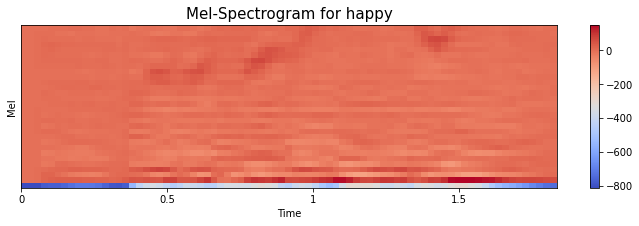

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sr = librosa.load(path,sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
create_mel_spec(data,sr,emotion)

In [ ]:
def match_dimension(data,input_length):

  if len(data) > input_length:
      max_offset = int(len(data) - input_length)
      data = data[0:input_length]
  else:
      max_offset =int(input_length - len(data))
      offset = np.zeros(max_offset)
      data=np.concatenate((data,offset),axis=0)

  return data

In [ ]:
sampling_rate=16000
audio_duration=2.5
n_mfcc = 30
n_melspec = 30
n_fft=512
def prepare_data(df, n, mfcc ,mel):
    X = np.empty(shape=(df.shape[0], n,79,1))
    input_length = sampling_rate * audio_duration

    cnt = 0
    for fname in tqdm(df.Path):
        file_path = fname
        data, sr = librosa.load(file_path, sr=sampling_rate
                               ,res_type="kaiser_fast"
                               ,duration=2.5
                               ,offset=0.5
                              )

        if len(data)!= input_length:

        # Random offset / Padding
            data=match_dimension(data,40000)




          # which feature?
          # if mfcc == 1:
          #       # MFCC extraction
          #   MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
          #   MFCC = np.expand_dims(MFCC, axis=-1)
          #   X[cnt,] = MFCC
          #   print('mfcc',MFCC.shape)

        if mfcc == 1 and mel== 0:
                  # MFCC extraction
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              MFCC = np.expand_dims(MFCC, axis=-1)
              X[cnt,] = MFCC
              print('mfcc',MFCC.shape)

        elif mfcc==0 and mel==1 :
                  # Log-melspectogram

              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              logspec = np.expand_dims(logspec, axis=-1)
              X[cnt,] = logspec

              print('mel',logspec.shape)

        elif mfcc==1 and mel== 1:
              MFCC = librosa.feature.mfcc(data, sr=sampling_rate, n_mfcc=n_mfcc)
              melspec = librosa.feature.melspectrogram(data,sr=sampling_rate, n_mels = n_melspec)
              logspec = librosa.amplitude_to_db(melspec)
              mfcc_logspec= np.concatenate((MFCC,logspec),axis=1)
              #mel_logspec= np.vstack([MFCC,logspec])
              #print(mfcc_logspec.shape)
              mfcc_logspec = np.expand_dims(mfcc_logspec, axis=-1)
              X[cnt,] = mfcc_logspec
              print('mfcc_logspec',mfcc_logspec.shape)

        cnt += 1

    return X

In [ ]:
mel_s=prepare_data(data_path,n=30,mfcc=0,mel=1)

  0%|          | 3/4240 [00:00<03:14, 21.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  0%|          | 6/4240 [00:00<03:31, 20.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  0%|          | 11/4240 [00:00<03:43, 18.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  0%|          | 15/4240 [00:00<03:43, 18.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  0%|          | 19/4240 [00:01<03:45, 18.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 23/4240 [00:01<03:46, 18.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 27/4240 [00:01<03:55, 17.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 31/4240 [00:01<03:48, 18.39it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 35/4240 [00:01<03:45, 18.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 39/4240 [00:02<03:43, 18.79it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 43/4240 [00:02<03:41, 18.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 47/4240 [00:02<03:58, 17.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|          | 51/4240 [00:02<03:51, 18.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|▏         | 55/4240 [00:02<03:43, 18.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|▏         | 59/4240 [00:03<03:41, 18.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  1%|▏         | 63/4240 [00:03<03:40, 18.92it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 67/4240 [00:03<03:45, 18.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 71/4240 [00:03<03:43, 18.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 75/4240 [00:04<03:41, 18.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 79/4240 [00:04<03:39, 18.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 83/4240 [00:04<03:39, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 87/4240 [00:04<03:47, 18.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 91/4240 [00:04<03:41, 18.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 95/4240 [00:05<03:40, 18.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 99/4240 [00:05<03:38, 18.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  2%|▏         | 103/4240 [00:05<03:35, 19.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 107/4240 [00:05<03:48, 18.07it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 111/4240 [00:05<03:43, 18.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 115/4240 [00:06<03:40, 18.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 119/4240 [00:06<03:37, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 123/4240 [00:06<03:38, 18.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 127/4240 [00:06<03:46, 18.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 131/4240 [00:07<03:43, 18.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 135/4240 [00:07<03:44, 18.32it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 139/4240 [00:07<03:41, 18.49it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 143/4240 [00:07<03:49, 17.87it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  3%|▎         | 147/4240 [00:07<03:41, 18.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▎         | 151/4240 [00:08<03:35, 18.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▎         | 155/4240 [00:08<03:31, 19.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 159/4240 [00:08<03:37, 18.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 163/4240 [00:08<03:38, 18.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 167/4240 [00:08<03:36, 18.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 171/4240 [00:09<03:37, 18.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 175/4240 [00:09<03:36, 18.80it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 179/4240 [00:09<03:35, 18.87it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 183/4240 [00:09<03:41, 18.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  4%|▍         | 187/4240 [00:10<03:45, 18.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▍         | 191/4240 [00:10<03:42, 18.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▍         | 195/4240 [00:10<03:35, 18.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▍         | 199/4240 [00:10<03:43, 18.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▍         | 203/4240 [00:10<03:44, 17.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▍         | 207/4240 [00:11<03:43, 18.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▍         | 211/4240 [00:11<03:37, 18.55it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▌         | 215/4240 [00:11<03:32, 18.90it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▌         | 219/4240 [00:11<03:35, 18.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▌         | 223/4240 [00:12<03:34, 18.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▌         | 227/4240 [00:12<03:33, 18.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  5%|▌         | 231/4240 [00:12<03:34, 18.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 235/4240 [00:12<03:31, 18.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 239/4240 [00:12<03:34, 18.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 243/4240 [00:13<03:34, 18.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 247/4240 [00:13<03:32, 18.78it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 251/4240 [00:13<03:28, 19.15it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 255/4240 [00:13<03:34, 18.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 259/4240 [00:13<03:38, 18.26it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▌         | 263/4240 [00:14<03:38, 18.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▋         | 267/4240 [00:14<03:35, 18.47it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▋         | 271/4240 [00:14<03:31, 18.80it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  6%|▋         | 275/4240 [00:14<03:37, 18.26it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 279/4240 [00:15<03:30, 18.78it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 283/4240 [00:15<03:31, 18.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 287/4240 [00:15<03:28, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 291/4240 [00:15<03:30, 18.74it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 295/4240 [00:15<03:40, 17.90it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 299/4240 [00:16<03:39, 17.92it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 303/4240 [00:16<03:37, 18.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 307/4240 [00:16<03:35, 18.29it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 311/4240 [00:16<03:31, 18.55it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  7%|▋         | 315/4240 [00:17<03:39, 17.87it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 319/4240 [00:17<03:36, 18.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 323/4240 [00:17<03:32, 18.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 327/4240 [00:17<03:34, 18.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 331/4240 [00:17<03:42, 17.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 335/4240 [00:18<03:35, 18.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 339/4240 [00:18<03:28, 18.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 343/4240 [00:18<03:31, 18.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 347/4240 [00:18<03:32, 18.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 351/4240 [00:18<03:37, 17.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 355/4240 [00:19<03:37, 17.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  8%|▊         | 359/4240 [00:19<03:32, 18.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▊         | 363/4240 [00:19<03:33, 18.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▊         | 367/4240 [00:19<03:27, 18.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 371/4240 [00:20<03:28, 18.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 375/4240 [00:20<03:26, 18.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 379/4240 [00:20<03:24, 18.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 383/4240 [00:20<03:26, 18.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 387/4240 [00:20<03:33, 18.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 391/4240 [00:21<03:33, 18.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 395/4240 [00:21<03:40, 17.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


  9%|▉         | 399/4240 [00:21<03:30, 18.29it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|▉         | 403/4240 [00:21<03:25, 18.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|▉         | 407/4240 [00:22<03:23, 18.85it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|▉         | 411/4240 [00:22<03:25, 18.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|▉         | 415/4240 [00:22<03:21, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|▉         | 419/4240 [00:22<03:20, 19.07it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|▉         | 423/4240 [00:22<03:19, 19.15it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|█         | 427/4240 [00:23<03:25, 18.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|█         | 431/4240 [00:23<03:25, 18.53it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|█         | 435/4240 [00:23<03:26, 18.47it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|█         | 439/4240 [00:23<03:25, 18.53it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 10%|█         | 443/4240 [00:23<03:24, 18.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█         | 447/4240 [00:24<03:34, 17.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█         | 451/4240 [00:24<03:30, 18.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█         | 455/4240 [00:24<03:23, 18.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█         | 459/4240 [00:24<03:25, 18.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█         | 463/4240 [00:25<03:33, 17.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█         | 467/4240 [00:25<03:33, 17.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█         | 471/4240 [00:25<03:31, 17.83it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█         | 475/4240 [00:25<03:24, 18.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█▏        | 479/4240 [00:25<03:20, 18.75it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█▏        | 483/4240 [00:26<03:20, 18.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 11%|█▏        | 487/4240 [00:26<03:16, 19.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 491/4240 [00:26<03:19, 18.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 495/4240 [00:26<03:17, 18.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 499/4240 [00:27<03:23, 18.39it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 503/4240 [00:27<03:23, 18.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 507/4240 [00:27<03:20, 18.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 511/4240 [00:27<03:17, 18.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 516/4240 [00:27<03:16, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 520/4240 [00:28<03:20, 18.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 524/4240 [00:28<03:20, 18.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 12%|█▏        | 528/4240 [00:28<03:23, 18.26it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 532/4240 [00:28<03:25, 18.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 536/4240 [00:29<03:23, 18.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 540/4240 [00:29<03:26, 17.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 544/4240 [00:29<03:19, 18.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 548/4240 [00:29<03:24, 18.03it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 552/4240 [00:29<03:22, 18.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 556/4240 [00:30<03:17, 18.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 560/4240 [00:30<03:17, 18.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 564/4240 [00:30<03:14, 18.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 568/4240 [00:30<03:20, 18.33it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 13%|█▎        | 572/4240 [00:31<03:19, 18.39it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▎        | 576/4240 [00:31<03:24, 17.93it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▎        | 580/4240 [00:31<03:21, 18.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 584/4240 [00:31<03:18, 18.38it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 588/4240 [00:31<03:19, 18.32it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 592/4240 [00:32<03:27, 17.62it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 596/4240 [00:32<03:25, 17.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 600/4240 [00:32<03:24, 17.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 604/4240 [00:32<03:20, 18.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 608/4240 [00:33<03:19, 18.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 14%|█▍        | 612/4240 [00:33<03:23, 17.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▍        | 616/4240 [00:33<03:21, 17.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▍        | 620/4240 [00:33<03:21, 17.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▍        | 624/4240 [00:33<03:22, 17.85it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▍        | 628/4240 [00:34<03:17, 18.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▍        | 632/4240 [00:34<03:20, 17.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▌        | 636/4240 [00:34<03:18, 18.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▌        | 640/4240 [00:34<03:16, 18.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▌        | 644/4240 [00:35<03:16, 18.32it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▌        | 648/4240 [00:35<03:14, 18.43it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▌        | 652/4240 [00:35<03:17, 18.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 15%|█▌        | 656/4240 [00:35<03:14, 18.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 660/4240 [00:35<03:22, 17.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 664/4240 [00:36<03:15, 18.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 668/4240 [00:36<03:11, 18.64it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 672/4240 [00:36<03:15, 18.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 676/4240 [00:36<03:16, 18.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 680/4240 [00:36<03:11, 18.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 684/4240 [00:37<03:09, 18.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▌        | 688/4240 [00:37<03:14, 18.28it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▋        | 692/4240 [00:37<03:12, 18.39it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 16%|█▋        | 696/4240 [00:37<03:13, 18.36it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 700/4240 [00:38<03:08, 18.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 704/4240 [00:38<03:11, 18.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 708/4240 [00:38<03:10, 18.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 712/4240 [00:38<03:10, 18.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 716/4240 [00:38<03:10, 18.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 720/4240 [00:39<03:13, 18.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 724/4240 [00:39<03:16, 17.93it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 728/4240 [00:39<03:15, 17.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 732/4240 [00:39<03:18, 17.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 736/4240 [00:40<03:15, 17.96it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 17%|█▋        | 740/4240 [00:40<03:12, 18.14it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 744/4240 [00:40<03:12, 18.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 748/4240 [00:40<03:07, 18.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 752/4240 [00:40<03:04, 18.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 756/4240 [00:41<03:06, 18.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 760/4240 [00:41<03:07, 18.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 764/4240 [00:41<03:12, 18.10it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 768/4240 [00:41<03:08, 18.43it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 772/4240 [00:42<03:04, 18.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 776/4240 [00:42<03:06, 18.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 780/4240 [00:42<03:10, 18.18it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 18%|█▊        | 784/4240 [00:42<03:11, 18.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▊        | 788/4240 [00:42<03:17, 17.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▊        | 792/4240 [00:43<03:13, 17.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 796/4240 [00:43<03:14, 17.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 800/4240 [00:43<03:13, 17.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 804/4240 [00:43<03:08, 18.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 808/4240 [00:44<03:09, 18.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 812/4240 [00:44<03:11, 17.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 816/4240 [00:44<03:05, 18.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 820/4240 [00:44<03:08, 18.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 19%|█▉        | 824/4240 [00:44<03:05, 18.43it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|█▉        | 828/4240 [00:45<03:02, 18.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|█▉        | 832/4240 [00:45<03:00, 18.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|█▉        | 836/4240 [00:45<03:05, 18.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|█▉        | 840/4240 [00:45<03:04, 18.44it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|█▉        | 844/4240 [00:45<03:01, 18.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|██        | 848/4240 [00:46<03:02, 18.58it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|██        | 852/4240 [00:46<02:59, 18.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|██        | 856/4240 [00:46<03:04, 18.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|██        | 860/4240 [00:46<03:01, 18.58it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|██        | 864/4240 [00:47<03:01, 18.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 20%|██        | 868/4240 [00:47<02:59, 18.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 872/4240 [00:47<03:13, 17.37it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 876/4240 [00:47<03:28, 16.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 880/4240 [00:48<03:15, 17.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 884/4240 [00:48<03:09, 17.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 888/4240 [00:48<03:04, 18.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 892/4240 [00:48<03:16, 17.03it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 896/4240 [00:48<03:10, 17.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██        | 900/4240 [00:49<03:06, 17.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██▏       | 904/4240 [00:49<02:59, 18.64it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 21%|██▏       | 908/4240 [00:49<03:00, 18.49it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 912/4240 [00:49<03:08, 17.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 916/4240 [00:50<03:04, 18.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 920/4240 [00:50<03:03, 18.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 924/4240 [00:50<02:58, 18.58it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 928/4240 [00:50<03:06, 17.80it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 932/4240 [00:50<03:02, 18.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 936/4240 [00:51<02:59, 18.38it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 940/4240 [00:51<02:57, 18.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 944/4240 [00:51<03:01, 18.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 948/4240 [00:51<03:07, 17.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 22%|██▏       | 952/4240 [00:52<03:04, 17.80it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 956/4240 [00:52<03:02, 17.96it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 960/4240 [00:52<03:04, 17.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 964/4240 [00:52<02:58, 18.36it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 968/4240 [00:52<02:59, 18.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 972/4240 [00:53<02:59, 18.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 976/4240 [00:53<02:55, 18.61it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 980/4240 [00:53<03:05, 17.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 984/4240 [00:53<03:07, 17.38it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 988/4240 [00:54<03:04, 17.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 992/4240 [00:54<02:58, 18.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 23%|██▎       | 996/4240 [00:54<02:53, 18.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▎       | 1000/4240 [00:54<02:54, 18.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▎       | 1004/4240 [00:54<02:57, 18.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 1008/4240 [00:55<03:02, 17.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 1012/4240 [00:55<02:57, 18.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 1016/4240 [00:55<02:56, 18.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 1020/4240 [00:55<02:58, 18.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 1024/4240 [00:56<03:02, 17.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 1028/4240 [00:56<03:02, 17.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 1032/4240 [00:56<02:54, 18.40it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 24%|██▍       | 1036/4240 [00:56<02:52, 18.62it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▍       | 1040/4240 [00:56<02:58, 17.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▍       | 1044/4240 [00:57<02:50, 18.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▍       | 1048/4240 [00:57<02:51, 18.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▍       | 1052/4240 [00:57<02:48, 18.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▍       | 1056/4240 [00:57<02:48, 18.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▌       | 1060/4240 [00:57<02:57, 17.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▌       | 1064/4240 [00:58<02:59, 17.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▌       | 1068/4240 [00:58<02:52, 18.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▌       | 1072/4240 [00:58<02:53, 18.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▌       | 1076/4240 [00:58<03:05, 17.07it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 25%|██▌       | 1080/4240 [00:59<03:06, 16.93it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 1084/4240 [00:59<02:57, 17.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 1088/4240 [00:59<02:53, 18.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 1092/4240 [00:59<02:50, 18.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 1096/4240 [00:59<02:53, 18.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 1100/4240 [01:00<02:49, 18.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 1104/4240 [01:00<02:45, 18.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 1108/4240 [01:00<02:47, 18.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▌       | 1112/4240 [01:00<02:45, 18.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▋       | 1116/4240 [01:01<02:52, 18.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 26%|██▋       | 1120/4240 [01:01<02:48, 18.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1124/4240 [01:01<02:46, 18.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1128/4240 [01:01<02:45, 18.80it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1132/4240 [01:01<02:46, 18.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1136/4240 [01:02<02:58, 17.39it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1140/4240 [01:02<03:02, 16.99it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1144/4240 [01:02<02:58, 17.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1148/4240 [01:02<02:55, 17.62it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1152/4240 [01:03<02:56, 17.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1156/4240 [01:03<02:56, 17.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1160/4240 [01:03<02:53, 17.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 27%|██▋       | 1164/4240 [01:03<02:55, 17.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1168/4240 [01:03<02:51, 17.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1172/4240 [01:04<02:57, 17.33it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1176/4240 [01:04<02:53, 17.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1180/4240 [01:04<02:47, 18.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1184/4240 [01:04<02:44, 18.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1188/4240 [01:05<02:49, 18.02it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1192/4240 [01:05<02:45, 18.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1196/4240 [01:05<02:43, 18.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1200/4240 [01:05<02:44, 18.43it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1204/4240 [01:05<02:43, 18.58it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 28%|██▊       | 1208/4240 [01:06<02:46, 18.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▊       | 1212/4240 [01:06<02:42, 18.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▊       | 1216/4240 [01:06<02:40, 18.79it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 1220/4240 [01:06<02:39, 18.91it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 1224/4240 [01:07<02:37, 19.14it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 1228/4240 [01:07<02:43, 18.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 1232/4240 [01:07<02:39, 18.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 1236/4240 [01:07<02:37, 19.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 1240/4240 [01:07<02:37, 19.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 1244/4240 [01:08<02:47, 17.85it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 29%|██▉       | 1248/4240 [01:08<02:48, 17.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|██▉       | 1252/4240 [01:08<02:46, 17.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|██▉       | 1256/4240 [01:08<02:44, 18.15it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|██▉       | 1260/4240 [01:09<02:40, 18.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|██▉       | 1264/4240 [01:09<02:43, 18.18it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|██▉       | 1268/4240 [01:09<02:42, 18.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|███       | 1272/4240 [01:09<02:39, 18.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|███       | 1276/4240 [01:09<02:42, 18.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|███       | 1280/4240 [01:10<02:39, 18.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|███       | 1284/4240 [01:10<02:44, 18.02it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|███       | 1288/4240 [01:10<02:49, 17.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 30%|███       | 1292/4240 [01:10<02:50, 17.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 1296/4240 [01:11<02:52, 17.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 1300/4240 [01:11<02:54, 16.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 1304/4240 [01:11<02:47, 17.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 1308/4240 [01:11<02:48, 17.38it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 1312/4240 [01:11<02:43, 17.90it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 1316/4240 [01:12<02:42, 17.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 1320/4240 [01:12<02:45, 17.62it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███       | 1324/4240 [01:12<02:43, 17.85it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███▏      | 1328/4240 [01:12<02:38, 18.36it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 31%|███▏      | 1332/4240 [01:13<02:39, 18.29it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1336/4240 [01:13<02:46, 17.47it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1340/4240 [01:13<02:37, 18.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1344/4240 [01:13<02:38, 18.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1348/4240 [01:13<02:35, 18.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1352/4240 [01:14<02:33, 18.83it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1356/4240 [01:14<02:36, 18.44it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1360/4240 [01:14<02:34, 18.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1364/4240 [01:14<02:45, 17.43it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1368/4240 [01:15<02:40, 17.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1372/4240 [01:15<02:43, 17.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 32%|███▏      | 1376/4240 [01:15<02:36, 18.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1380/4240 [01:15<02:35, 18.40it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1384/4240 [01:15<02:35, 18.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1388/4240 [01:16<02:39, 17.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1392/4240 [01:16<02:41, 17.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1396/4240 [01:16<02:36, 18.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1400/4240 [01:16<02:43, 17.32it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1404/4240 [01:17<02:47, 16.92it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1408/4240 [01:17<02:45, 17.14it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1412/4240 [01:17<02:43, 17.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1416/4240 [01:17<02:41, 17.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 33%|███▎      | 1420/4240 [01:17<02:32, 18.44it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▎      | 1424/4240 [01:18<02:29, 18.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▎      | 1428/4240 [01:18<02:30, 18.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▍      | 1432/4240 [01:18<02:32, 18.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▍      | 1436/4240 [01:18<02:28, 18.90it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▍      | 1440/4240 [01:19<02:27, 19.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▍      | 1448/4240 [01:19<01:40, 27.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 34%|███▍      | 1456/4240 [01:19<01:28, 31.47it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 35%|███▍      | 1464/4240 [01:19<01:21, 34.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 35%|███▍      | 1468/4240 [01:19<01:22, 33.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 35%|███▍      | 1476/4240 [01:20<01:20, 34.38it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 35%|███▌      | 1484/4240 [01:20<01:18, 35.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 35%|███▌      | 1492/4240 [01:20<01:18, 34.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 35%|███▌      | 1500/4240 [01:20<01:17, 35.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 36%|███▌      | 1508/4240 [01:20<01:17, 35.38it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 36%|███▌      | 1516/4240 [01:21<01:15, 36.14it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 36%|███▌      | 1524/4240 [01:21<01:16, 35.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 36%|███▌      | 1532/4240 [01:21<01:17, 34.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 36%|███▋      | 1540/4240 [01:21<01:17, 34.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 1548/4240 [01:22<01:14, 36.37it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 1556/4240 [01:22<01:14, 36.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 1560/4240 [01:22<01:17, 34.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 1568/4240 [01:22<01:15, 35.37it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 1576/4240 [01:22<01:16, 34.79it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 37%|███▋      | 1584/4240 [01:23<01:16, 34.55it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 38%|███▊      | 1592/4240 [01:23<01:15, 34.87it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 38%|███▊      | 1600/4240 [01:23<01:19, 33.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 38%|███▊      | 1608/4240 [01:23<01:18, 33.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 38%|███▊      | 1612/4240 [01:24<01:18, 33.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 38%|███▊      | 1620/4240 [01:24<01:17, 33.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 38%|███▊      | 1628/4240 [01:24<01:14, 35.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 39%|███▊      | 1636/4240 [01:24<01:15, 34.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 39%|███▉      | 1645/4240 [01:24<01:09, 37.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 39%|███▉      | 1654/4240 [01:25<01:05, 39.43it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 39%|███▉      | 1664/4240 [01:25<01:04, 40.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 39%|███▉      | 1674/4240 [01:25<01:04, 40.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|███▉      | 1679/4240 [01:25<01:02, 41.09it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|███▉      | 1689/4240 [01:26<01:11, 35.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|███▉      | 1693/4240 [01:26<01:23, 30.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|████      | 1697/4240 [01:26<01:29, 28.56it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|████      | 1704/4240 [01:26<01:36, 26.33it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|████      | 1710/4240 [01:26<01:43, 24.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 40%|████      | 1713/4240 [01:27<01:45, 24.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████      | 1719/4240 [01:27<01:46, 23.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████      | 1725/4240 [01:27<01:47, 23.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████      | 1728/4240 [01:27<01:47, 23.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████      | 1737/4240 [01:28<01:45, 23.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████      | 1740/4240 [01:28<01:46, 23.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel 

 41%|████      | 1746/4240 [01:28<01:48, 23.00it/s]

(30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████▏     | 1752/4240 [01:28<01:44, 23.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 41%|████▏     | 1755/4240 [01:28<01:50, 22.43it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 1762/4240 [01:29<01:35, 25.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 1768/4240 [01:29<01:42, 24.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 1771/4240 [01:29<01:39, 24.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 1781/4240 [01:29<01:27, 28.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 1787/4240 [01:30<01:32, 26.47it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▏     | 1792/4240 [01:30<01:19, 30.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 42%|████▎     | 1802/4240 [01:30<01:06, 36.91it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 43%|████▎     | 1812/4240 [01:30<01:02, 39.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 43%|████▎     | 1822/4240 [01:30<00:58, 41.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 43%|████▎     | 1832/4240 [01:31<00:57, 42.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 43%|████▎     | 1837/4240 [01:31<00:55, 43.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 44%|████▎     | 1847/4240 [01:31<01:01, 39.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 44%|████▍     | 1855/4240 [01:31<01:06, 35.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 44%|████▍     | 1859/4240 [01:31<01:07, 35.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 44%|████▍     | 1867/4240 [01:32<01:09, 34.09it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 44%|████▍     | 1875/4240 [01:32<01:08, 34.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 44%|████▍     | 1883/4240 [01:32<01:09, 33.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 45%|████▍     | 1891/4240 [01:32<01:08, 34.29it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 45%|████▍     | 1899/4240 [01:33<01:07, 34.47it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 45%|████▍     | 1907/4240 [01:33<01:07, 34.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 45%|████▌     | 1911/4240 [01:33<01:09, 33.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 45%|████▌     | 1919/4240 [01:33<01:08, 33.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 45%|████▌     | 1927/4240 [01:33<01:09, 33.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▌     | 1935/4240 [01:34<01:08, 33.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▌     | 1943/4240 [01:34<01:09, 33.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▌     | 1947/4240 [01:34<01:10, 32.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▌     | 1955/4240 [01:34<01:08, 33.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▋     | 1963/4240 [01:35<01:08, 33.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 46%|████▋     | 1971/4240 [01:35<01:05, 34.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 47%|████▋     | 1979/4240 [01:35<01:07, 33.69it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 47%|████▋     | 1983/4240 [01:35<01:07, 33.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 47%|████▋     | 1991/4240 [01:35<01:07, 33.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 47%|████▋     | 1999/4240 [01:36<01:06, 33.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 47%|████▋     | 2007/4240 [01:36<01:08, 32.37it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 47%|████▋     | 2011/4240 [01:36<01:09, 32.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 48%|████▊     | 2019/4240 [01:36<01:08, 32.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 48%|████▊     | 2027/4240 [01:37<01:08, 32.14it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 48%|████▊     | 2035/4240 [01:37<01:04, 33.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 48%|████▊     | 2044/4240 [01:37<00:58, 37.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 48%|████▊     | 2054/4240 [01:37<00:51, 42.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 49%|████▊     | 2066/4240 [01:37<00:47, 46.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 49%|████▉     | 2076/4240 [01:38<00:45, 47.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 49%|████▉     | 2086/4240 [01:38<00:44, 48.03it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 49%|████▉     | 2092/4240 [01:38<00:43, 49.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 50%|████▉     | 2104/4240 [01:38<00:41, 51.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 50%|████▉     | 2116/4240 [01:38<00:40, 52.03it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 50%|█████     | 2128/4240 [01:39<00:41, 51.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 50%|█████     | 2140/4240 [01:39<00:40, 52.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 51%|█████     | 2152/4240 [01:39<00:40, 51.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 51%|█████     | 2164/4240 [01:39<00:41, 49.93it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 51%|█████     | 2170/4240 [01:40<00:43, 47.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 51%|█████▏    | 2181/4240 [01:40<00:41, 49.27it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 52%|█████▏    | 2193/4240 [01:40<00:39, 51.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 52%|█████▏    | 2205/4240 [01:40<00:39, 51.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 52%|█████▏    | 2217/4240 [01:40<00:40, 50.15it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 52%|█████▏    | 2223/4240 [01:41<00:42, 46.96it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 53%|█████▎    | 2234/4240 [01:41<00:41, 47.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 53%|█████▎    | 2244/4240 [01:41<00:43, 46.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 53%|█████▎    | 2254/4240 [01:41<00:49, 40.50it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 53%|█████▎    | 2259/4240 [01:41<00:50, 39.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 53%|█████▎    | 2267/4240 [01:42<00:52, 37.44it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 54%|█████▎    | 2275/4240 [01:42<00:52, 37.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 54%|█████▍    | 2283/4240 [01:42<00:55, 35.49it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 54%|█████▍    | 2291/4240 [01:42<00:54, 35.49it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 54%|█████▍    | 2299/4240 [01:43<00:54, 35.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 54%|█████▍    | 2307/4240 [01:43<00:55, 34.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 55%|█████▍    | 2315/4240 [01:43<00:53, 36.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 55%|█████▍    | 2324/4240 [01:43<00:50, 37.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 55%|█████▌    | 2332/4240 [01:44<00:52, 36.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 55%|█████▌    | 2340/4240 [01:44<00:53, 35.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 55%|█████▌    | 2348/4240 [01:44<00:51, 36.55it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▌    | 2356/4240 [01:44<00:50, 37.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▌    | 2364/4240 [01:44<00:50, 37.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▌    | 2372/4240 [01:45<00:51, 35.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▌    | 2380/4240 [01:45<00:50, 37.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▋    | 2388/4240 [01:45<00:53, 34.40it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 56%|█████▋    | 2392/4240 [01:45<00:53, 34.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 57%|█████▋    | 2400/4240 [01:45<00:54, 33.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 57%|█████▋    | 2408/4240 [01:46<00:51, 35.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 57%|█████▋    | 2416/4240 [01:46<00:51, 35.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 57%|█████▋    | 2424/4240 [01:46<00:49, 36.92it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 57%|█████▋    | 2432/4240 [01:46<00:50, 35.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 58%|█████▊    | 2440/4240 [01:47<00:51, 34.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 58%|█████▊    | 2448/4240 [01:47<00:51, 34.72it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 58%|█████▊    | 2458/4240 [01:47<00:45, 39.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 58%|█████▊    | 2466/4240 [01:47<00:47, 37.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 58%|█████▊    | 2471/4240 [01:47<00:46, 37.81it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 59%|█████▊    | 2481/4240 [01:48<00:43, 40.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 59%|█████▉    | 2491/4240 [01:48<00:42, 40.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 59%|█████▉    | 2501/4240 [01:48<00:43, 39.78it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 59%|█████▉    | 2510/4240 [01:48<00:42, 40.29it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 59%|█████▉    | 2515/4240 [01:48<00:42, 40.32it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 60%|█████▉    | 2525/4240 [01:49<00:40, 42.33it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 60%|█████▉    | 2535/4240 [01:49<00:40, 41.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 60%|██████    | 2545/4240 [01:49<00:40, 42.02it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 60%|██████    | 2555/4240 [01:49<00:40, 41.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 60%|██████    | 2560/4240 [01:50<00:40, 41.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 61%|██████    | 2570/4240 [01:50<00:41, 40.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 61%|██████    | 2580/4240 [01:50<00:40, 41.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 61%|██████    | 2590/4240 [01:50<00:38, 42.50it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 61%|██████    | 2595/4240 [01:50<00:39, 41.17it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 61%|██████▏   | 2605/4240 [01:51<00:38, 42.18it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 62%|██████▏   | 2615/4240 [01:51<00:38, 42.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 62%|██████▏   | 2625/4240 [01:51<00:39, 40.99it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 62%|██████▏   | 2635/4240 [01:51<00:37, 42.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 62%|██████▏   | 2645/4240 [01:52<00:36, 43.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 62%|██████▎   | 2650/4240 [01:52<00:36, 43.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 63%|██████▎   | 2660/4240 [01:52<00:39, 40.26it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 63%|██████▎   | 2670/4240 [01:52<00:37, 41.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 63%|██████▎   | 2680/4240 [01:52<00:38, 40.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 63%|██████▎   | 2685/4240 [01:53<00:38, 40.12it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 64%|██████▎   | 2695/4240 [01:53<00:39, 38.75it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 64%|██████▍   | 2705/4240 [01:53<00:36, 42.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 64%|██████▍   | 2715/4240 [01:53<00:36, 41.55it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 64%|██████▍   | 2725/4240 [01:54<00:37, 40.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 64%|██████▍   | 2730/4240 [01:54<00:37, 40.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 65%|██████▍   | 2740/4240 [01:54<00:36, 41.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 65%|██████▍   | 2750/4240 [01:54<00:35, 42.48it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 65%|██████▌   | 2760/4240 [01:54<00:36, 40.48it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 65%|██████▌   | 2770/4240 [01:55<00:36, 40.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 65%|██████▌   | 2775/4240 [01:55<00:36, 40.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 66%|██████▌   | 2785/4240 [01:55<00:35, 40.79it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 66%|██████▌   | 2795/4240 [01:55<00:35, 40.93it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 66%|██████▌   | 2805/4240 [01:56<00:35, 40.62it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 66%|██████▋   | 2815/4240 [01:56<00:33, 42.10it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 67%|██████▋   | 2825/4240 [01:56<00:34, 41.01it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 67%|██████▋   | 2830/4240 [01:56<00:33, 41.75it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 67%|██████▋   | 2840/4240 [01:56<00:34, 40.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 67%|██████▋   | 2850/4240 [01:57<00:34, 40.04it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 67%|██████▋   | 2855/4240 [01:57<00:35, 39.09it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 68%|██████▊   | 2864/4240 [01:57<00:36, 37.78it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 68%|██████▊   | 2872/4240 [01:57<00:36, 38.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 68%|██████▊   | 2881/4240 [01:57<00:35, 38.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 68%|██████▊   | 2889/4240 [01:58<00:36, 36.95it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 68%|██████▊   | 2898/4240 [01:58<00:34, 38.40it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 69%|██████▊   | 2906/4240 [01:58<00:36, 37.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 69%|██████▉   | 2915/4240 [01:58<00:34, 38.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 69%|██████▉   | 2923/4240 [01:59<00:34, 38.25it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 69%|██████▉   | 2931/4240 [01:59<00:33, 38.61it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 69%|██████▉   | 2939/4240 [01:59<00:34, 38.25it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 70%|██████▉   | 2948/4240 [01:59<00:34, 37.99it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 70%|██████▉   | 2957/4240 [01:59<00:33, 38.25it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 70%|██████▉   | 2965/4240 [02:00<00:33, 38.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 70%|███████   | 2969/4240 [02:00<00:33, 37.61it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 70%|███████   | 2979/4240 [02:00<00:33, 38.07it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 70%|███████   | 2988/4240 [02:00<00:32, 38.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 71%|███████   | 2997/4240 [02:00<00:31, 39.58it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 71%|███████   | 3006/4240 [02:01<00:31, 39.32it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 71%|███████   | 3015/4240 [02:01<00:30, 39.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 71%|███████▏  | 3023/4240 [02:01<00:32, 37.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 71%|███████▏  | 3031/4240 [02:01<00:32, 37.22it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 72%|███████▏  | 3039/4240 [02:02<00:31, 37.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 72%|███████▏  | 3049/4240 [02:02<00:29, 40.04it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 72%|███████▏  | 3059/4240 [02:02<00:27, 43.25it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 72%|███████▏  | 3070/4240 [02:02<00:25, 45.90it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 73%|███████▎  | 3082/4240 [02:02<00:22, 50.47it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 73%|███████▎  | 3088/4240 [02:03<00:22, 50.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel 

 73%|███████▎  | 3100/4240 [02:03<00:21, 52.88it/s]

(30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 73%|███████▎  | 3112/4240 [02:03<00:21, 52.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 74%|███████▎  | 3124/4240 [02:03<00:21, 50.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 74%|███████▍  | 3136/4240 [02:04<00:21, 50.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 74%|███████▍  | 3148/4240 [02:04<00:21, 50.49it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 74%|███████▍  | 3154/4240 [02:04<00:22, 49.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 75%|███████▍  | 3164/4240 [02:04<00:22, 48.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 75%|███████▍  | 3175/4240 [02:04<00:22, 48.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 75%|███████▌  | 3186/4240 [02:05<00:21, 49.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 75%|███████▌  | 3198/4240 [02:05<00:20, 52.02it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 76%|███████▌  | 3210/4240 [02:05<00:19, 51.83it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 76%|███████▌  | 3222/4240 [02:05<00:20, 49.83it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 76%|███████▌  | 3232/4240 [02:05<00:20, 48.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 76%|███████▋  | 3242/4240 [02:06<00:21, 46.60it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 77%|███████▋  | 3247/4240 [02:06<00:23, 42.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 77%|███████▋  | 3257/4240 [02:06<00:23, 42.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 77%|███████▋  | 3267/4240 [02:06<00:22, 42.33it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 77%|███████▋  | 3277/4240 [02:07<00:23, 41.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 78%|███████▊  | 3287/4240 [02:07<00:23, 40.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 78%|███████▊  | 3292/4240 [02:07<00:23, 40.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 78%|███████▊  | 3302/4240 [02:07<00:22, 41.54it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 78%|███████▊  | 3312/4240 [02:07<00:22, 41.78it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 78%|███████▊  | 3322/4240 [02:08<00:22, 41.51it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 79%|███████▊  | 3332/4240 [02:08<00:21, 41.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 79%|███████▊  | 3337/4240 [02:08<00:21, 41.31it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 79%|███████▉  | 3347/4240 [02:08<00:23, 38.69it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 79%|███████▉  | 3357/4240 [02:09<00:22, 39.05it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 79%|███████▉  | 3365/4240 [02:09<00:23, 37.32it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|███████▉  | 3374/4240 [02:09<00:22, 39.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|███████▉  | 3382/4240 [02:09<00:22, 37.92it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|███████▉  | 3386/4240 [02:09<00:24, 35.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|████████  | 3395/4240 [02:10<00:23, 36.35it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|████████  | 3405/4240 [02:10<00:21, 39.30it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 80%|████████  | 3413/4240 [02:10<00:20, 39.52it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 81%|████████  | 3421/4240 [02:10<00:22, 36.71it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 81%|████████  | 3430/4240 [02:11<00:21, 37.54it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 81%|████████  | 3438/4240 [02:11<00:21, 37.64it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 81%|████████▏ | 3447/4240 [02:11<00:20, 38.77it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 81%|████████▏ | 3455/4240 [02:11<00:20, 37.88it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 82%|████████▏ | 3463/4240 [02:11<00:21, 35.75it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 82%|████████▏ | 3472/4240 [02:12<00:20, 37.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 82%|████████▏ | 3477/4240 [02:12<00:19, 38.36it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 82%|████████▏ | 3487/4240 [02:12<00:18, 39.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 82%|████████▏ | 3497/4240 [02:12<00:18, 41.25it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 83%|████████▎ | 3506/4240 [02:12<00:18, 38.73it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 83%|████████▎ | 3515/4240 [02:13<00:18, 39.33it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 83%|████████▎ | 3524/4240 [02:13<00:17, 40.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 83%|████████▎ | 3534/4240 [02:13<00:17, 39.26it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 84%|████████▎ | 3542/4240 [02:13<00:18, 36.86it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 84%|████████▍ | 3551/4240 [02:14<00:17, 38.99it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 84%|████████▍ | 3560/4240 [02:14<00:16, 40.76it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 84%|████████▍ | 3565/4240 [02:14<00:16, 40.39it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 84%|████████▍ | 3575/4240 [02:14<00:16, 41.06it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 85%|████████▍ | 3584/4240 [02:14<00:16, 38.63it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 85%|████████▍ | 3592/4240 [02:15<00:17, 38.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 85%|████████▍ | 3602/4240 [02:15<00:15, 40.82it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 85%|████████▌ | 3612/4240 [02:15<00:15, 41.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 85%|████████▌ | 3622/4240 [02:15<00:14, 42.48it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 86%|████████▌ | 3627/4240 [02:16<00:15, 40.21it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 86%|████████▌ | 3637/4240 [02:16<00:14, 42.53it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 86%|████████▌ | 3647/4240 [02:16<00:14, 42.02it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 86%|████████▋ | 3657/4240 [02:16<00:13, 43.43it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)

 86%|████████▋ | 3667/4240 [02:16<00:12, 44.60it/s]


mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 87%|████████▋ | 3672/4240 [02:17<00:13, 41.97it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 87%|████████▋ | 3682/4240 [02:17<00:13, 42.91it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 87%|████████▋ | 3692/4240 [02:17<00:12, 44.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 87%|████████▋ | 3702/4240 [02:17<00:12, 43.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 88%|████████▊ | 3712/4240 [02:18<00:12, 43.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 88%|████████▊ | 3722/4240 [02:18<00:11, 43.67it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 88%|████████▊ | 3732/4240 [02:18<00:11, 44.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 88%|████████▊ | 3742/4240 [02:18<00:11, 44.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel 

 88%|████████▊ | 3752/4240 [02:18<00:11, 44.26it/s]

(30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 89%|████████▊ | 3757/4240 [02:19<00:10, 44.26it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 89%|████████▉ | 3767/4240 [02:19<00:11, 42.38it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 89%|████████▉ | 3777/4240 [02:19<00:11, 39.87it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 89%|████████▉ | 3786/4240 [02:19<00:12, 37.38it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 90%|████████▉ | 3795/4240 [02:20<00:11, 40.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 90%|████████▉ | 3800/4240 [02:20<00:11, 39.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 90%|████████▉ | 3810/4240 [02:20<00:10, 40.59it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 90%|█████████ | 3820/4240 [02:20<00:09, 42.08it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 90%|█████████ | 3830/4240 [02:20<00:09, 43.49it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 91%|█████████ | 3840/4240 [02:21<00:09, 43.78it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 91%|█████████ | 3845/4240 [02:21<00:09, 41.07it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 91%|█████████ | 3855/4240 [02:21<00:09, 40.66it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 91%|█████████ | 3865/4240 [02:21<00:09, 40.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 91%|█████████▏| 3875/4240 [02:21<00:08, 41.40it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 92%|█████████▏| 3880/4240 [02:22<00:08, 41.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 92%|█████████▏| 3890/4240 [02:22<00:08, 40.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 92%|█████████▏| 3900/4240 [02:22<00:08, 40.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 92%|█████████▏| 3910/4240 [02:22<00:08, 40.57it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 92%|█████████▏| 3915/4240 [02:22<00:07, 40.94it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 93%|█████████▎| 3925/4240 [02:23<00:07, 40.74it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 93%|█████████▎| 3935/4240 [02:23<00:07, 41.46it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 93%|█████████▎| 3945/4240 [02:23<00:07, 40.98it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 93%|█████████▎| 3950/4240 [02:23<00:07, 41.00it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 93%|█████████▎| 3960/4240 [02:24<00:06, 41.41it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 94%|█████████▎| 3970/4240 [02:24<00:06, 39.13it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 94%|█████████▍| 3979/4240 [02:24<00:06, 39.36it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 94%|█████████▍| 3987/4240 [02:24<00:06, 37.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 94%|█████████▍| 3996/4240 [02:24<00:06, 39.11it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 94%|█████████▍| 4005/4240 [02:25<00:05, 39.70it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 95%|█████████▍| 4015/4240 [02:25<00:05, 41.65it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 95%|█████████▍| 4020/4240 [02:25<00:05, 39.19it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 95%|█████████▌| 4029/4240 [02:25<00:05, 38.24it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 95%|█████████▌| 4037/4240 [02:26<00:05, 37.77it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 95%|█████████▌| 4046/4240 [02:26<00:04, 40.84it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 96%|█████████▌| 4057/4240 [02:26<00:04, 44.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 96%|█████████▌| 4068/4240 [02:26<00:03, 48.17it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 96%|█████████▌| 4073/4240 [02:26<00:03, 44.94it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 96%|█████████▋| 4084/4240 [02:27<00:03, 47.16it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 97%|█████████▋| 4096/4240 [02:27<00:02, 48.89it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 97%|█████████▋| 4106/4240 [02:27<00:02, 48.20it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 97%|█████████▋| 4116/4240 [02:27<00:02, 47.34it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 97%|█████████▋| 4126/4240 [02:27<00:02, 46.68it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 98%|█████████▊| 4136/4240 [02:28<00:02, 47.15it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 98%|█████████▊| 4146/4240 [02:28<00:02, 44.74it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 98%|█████████▊| 4156/4240 [02:28<00:01, 45.23it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 98%|█████████▊| 4167/4240 [02:28<00:01, 45.45it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 99%|█████████▊| 4177/4240 [02:29<00:01, 45.42it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 99%|█████████▉| 4187/4240 [02:29<00:01, 45.58it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel

 99%|█████████▉| 4197/4240 [02:29<00:00, 45.01it/s]

 (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)

 99%|█████████▉| 4208/4240 [02:29<00:00, 47.35it/s]


mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


 99%|█████████▉| 4218/4240 [02:29<00:00, 47.14it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


100%|█████████▉| 4228/4240 [02:30<00:00, 46.49it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


100%|█████████▉| 4233/4240 [02:30<00:00, 44.71it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


100%|██████████| 4240/4240 [02:30<00:00, 28.18it/s]

mel (30, 79, 1)
mel (30, 79, 1)
mel (30, 79, 1)


In [ ]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[191]
data, sr = librosa.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
#data, sr = librosa.load(path)
if len(data)!= input_length:

# Random offset / Padding
    data=match_dimension(data,40000)

melspec = librosa.feature.melspectrogram(data,sr=16000,n_mels = 30)
logspec = librosa.amplitude_to_db(melspec)
logspec.shape

(30, 79)

In [ ]:
emotion='disgust'
path = np.array(data_path.Path[data_path.Emotions==emotion])[212]
data, sr = librosa.load(path, sr=16000, offset=0.5, duration=2.5, res_type='kaiser_fast')
#data, sr = librosa.load(path)
if len(data)!= input_length:

# Random offset / Padding
    data=match_dimension(data,40000)
melspec = librosa.feature.melspectrogram(data,sr=16000,n_mels = 30)
logspec = librosa.amplitude_to_db(melspec)
logspec.shape

(30, 79)

In [ ]:
# New model
model = Sequential()
model.add(Conv2D(256, (3,3), padding="same",input_shape=(30,79,1)))
model.add(BatchNormalization())
#model.add(Activation('elu'))
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())


model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('elu'))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())


model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('elu'))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())


model.add(Flatten())
model.add(Dense(32))
model.add(Dropout(0.2))

model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 79, 256)       2560      
                                                                 
 batch_normalization (BatchN  (None, 30, 79, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 79, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 39, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 39, 128)       295040    
                                                                 
 batch_normalization_1 (Batc  (None, 15, 39, 128)      5

In [ ]:
# New model
model = Sequential()
model.add(Conv2D(256, (3,3), padding="same",input_shape=(30,79,1)))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), padding="same"))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('LeakyRelu'))
model.add(MaxPool2D())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=0.1))
#model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(8)) # Target class number
model.add(Activation('softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 79, 256)       2560      
                                                                 
 batch_normalization (BatchN  (None, 30, 79, 256)      1024      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 30, 79, 256)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 39, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 39, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 15, 39, 128)       2

In [ ]:
# As this is a multiclass classification problem onehotencoding our Y.
Y = data_path['Emotions'].values
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
Y

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
encoder=OneHotEncoder(sparse=False)
encoded_labels = pd.DataFrame (encoder.fit_transform(data_path[['Emotions']]))
encoded_labels.columns = encoder.get_feature_names(['Emotions'])
encoded_labels

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Emotions_angry,Emotions_calm,Emotions_disgust,Emotions_fear,Emotions_happy,Emotions_neutral,Emotions_sad,Emotions_surprise
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
4235,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4236,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4237,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4238,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# Split between train and test

X_train, X_test1, y_train, y_test1=train_test_split(mel_s
                                                    , encoded_labels
                                                    , test_size=0.3
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.3, random_state=42)
# one hot encode the target
#lb = LabelEncoder()
#y_train = np_utils.to_categorical(lb.fit_transform(y_train))
#y_test = np_utils.to_categorical(lb.fit_transform(y_test))
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(2968, 30, 79, 1) (382, 30, 79, 1) (890, 30, 79, 1) (2968, 8) (382, 8) (890, 8)


In [ ]:
# Normalization as per the standard NN process
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std
X_val = (X_val - mean)/std
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

(2968, 30, 79, 1) (382, 30, 79, 1) (890, 30, 79, 1) (2968, 8) (382, 8) (890, 8)


In [ ]:
''' Callbacks with Checkpoint'''

keras.backend.clear_session()

accuracy_threshold = 0.93

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
      if(logs.get('accuracy')>accuracy_threshold):
        print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
        self.model.stop_training = True

acc_callback = myCallback()
  # Saved the Best Model
filepath = "/content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel4.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
callback_list = [acc_callback, checkpoint]

In [ ]:
history=model.fit(X_train, y_train, epochs=300,validation_data = (X_val,y_val),callbacks=[checkpoint],batch_size=64)

Epoch 1/300
47/47 [==============================] - ETA: 0s - loss: 1.8485 - accuracy: 0.3211
Epoch 1: val_accuracy improved from -inf to 0.31461, saving model to /content/drive/MyDrive/THSIS/rav_tess_dataset/best_model/mymodel4.h5
47/47 [==============================] - 15s 107ms/step - loss: 1.8485 - accuracy: 0.3211 - val_loss: 1.9187 - val_accuracy: 0.3146
Epoch 2/300
47/47 [==============================] - ETA: 0s - loss: 1.2776 - accuracy: 0.5489
Epoch 2: val_accuracy did not improve from 0.31461
47/47 [==============================] - 2s 43ms/step - loss: 1.2776 - accuracy: 0.5489 - val_loss: 2.2245 - val_accuracy: 0.1944
Epoch 3/300
47/47 [==============================] - ETA: 0s - loss: 1.0086 - accuracy: 0.6671
Epoch 3: val_accuracy did not improve from 0.31461
47/47 [==============================] - 2s 42ms/step - loss: 1.0086 - accuracy: 0.6671 - val_loss: 2.4244 - val_accuracy: 0.2798
Epoch 4/300
47/47 [==============================] - ETA: 0s - loss: 0.8547 - accur

In [ ]:
# Evaluation
print("Accuracy of our model on test data : " , model.evaluate(X_test,y_test)[1]*100 , "%")

12/12 [==============================] - 1s 25ms/step - loss: 0.4754 - accuracy: 0.8979
Accuracy of our model on test data :  89.79057669639587 %


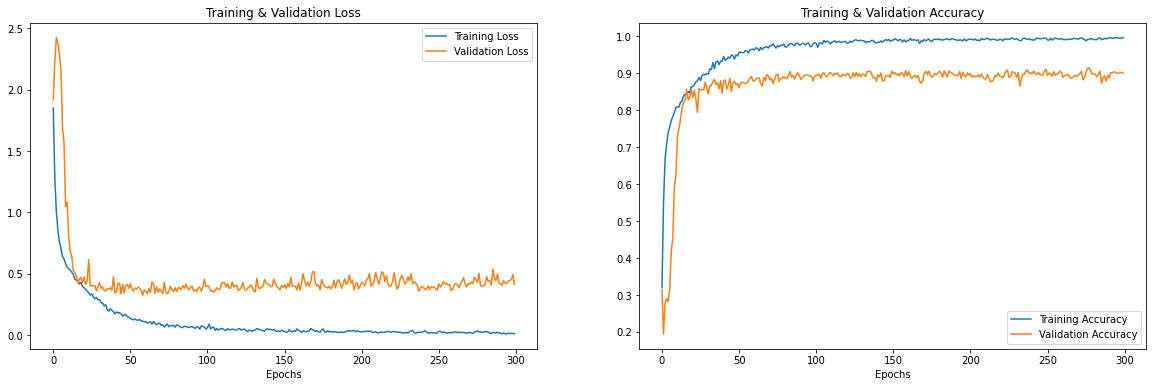

In [ ]:
epochs = [i for i in range(300)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Validation Accuracy')
ax[1].set_title('Training & Validation Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

12/12 [==============================] - 0s 8ms/step


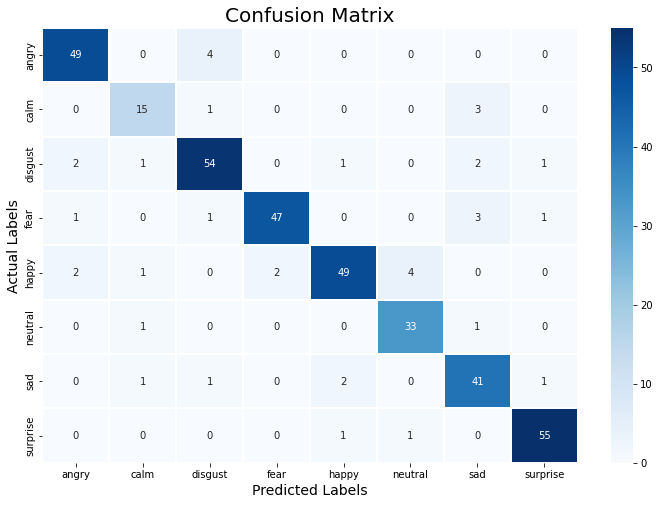

              precision    recall  f1-score   support

       angry       0.91      0.92      0.92        53
        calm       0.79      0.79      0.79        19
     disgust       0.89      0.89      0.89        61
        fear       0.96      0.89      0.92        53
       happy       0.92      0.84      0.88        58
     neutral       0.87      0.94      0.90        35
         sad       0.82      0.89      0.85        46
    surprise       0.95      0.96      0.96        57

    accuracy                           0.90       382
   macro avg       0.89      0.89      0.89       382
weighted avg       0.90      0.90      0.90       382



In [ ]:
# predicting on test data.
pred_test = model.predict(X_test)
#pred_test = pred_test.astype(int).flatten()
y_pred = encoder.inverse_transform(pred_test)

#y_test = y_test.astype(int).flatten()
y_test = encoder.inverse_transform(y_test)
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 8))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()
print(classification_report(y_test, y_pred))